In [1]:
from __future__ import print_function
import time
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import explained_variance_score
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from matplotlib import cm
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.decomposition import PCA, FactorAnalysis, NMF
from sklearn.covariance import ShrunkCovariance, LedoitWolf
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [3]:
np.random.seed(88)
bank = pd.read_csv("~/banking_data.csv")
bank.head()

,Bankrupt,ROA_C_beforeinterestanddepreciationbeforeinterest,ROA_A_beforeinterestandPRCTaftertax,ROA_B_beforeinterestanddepreciationaftertax,OperatingGrossMargin,RealizedSalesGrossMargin,OperatingProfitRate,Pre-taxnetInterestRate,After-taxnetInterestRate,Non-industryincomeandexpenditure/revenue,...,NetIncometoTotalAssets,TotalassetstoGNPprice,No-creditInterval,GrossProfittoSales,NetIncometoStockholder'sEquity,LiabilitytoEquity,DegreeofFinancialLeverage_DFL_,InterestCoverageRatio_InterestexpensetoEBIT_,NetIncomeFlag,EquitytoLiability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [4]:
bankX = bank.drop("Bankrupt", 1).copy().values
bankY = bank["Bankrupt"].copy().values
bank_x_df = bank.drop("Bankrupt",1)
min_max_scaler = preprocessing.MinMaxScaler()
bankX = min_max_scaler.fit_transform(bankX)
bankX_df = pd.DataFrame(bankX, columns=bank_x_df.columns)

In [5]:
%%time
model = FactorAnalysis(n_components=10, random_state=44)
x_prime = model.fit_transform(bankX)

Wall time: 1.27 s


In [8]:
bankX.shape

(6819, 95)

In [12]:
ufcX.shape

(3592, 156)

In [13]:
dims_bank = list(range(2,75,5))

In [5]:
%%time
sfm = SelectFromModel(LassoCV(max_iter=10000), threshold=0.1)
sfm.fit(bankX, bankY)
n_features = sfm.transform(bankX).shape[1]

Wall time: 422 ms


In [6]:
n_features

6

In [7]:
x_prime = sfm.transform(bankX)

In [19]:
#A = np.linalg.pinv(fa.components_.T)
#reconstructed = np.dot(x_prime, A)
#rc_err = mean_squared_error(bankX_df.values, reconstructed)    
#rc_errors[dim] = rc_err

In [6]:
sfm = SelectFromModel(LassoCV(max_iter=10000), max_features=40)
sfm.fit(bankX, bankY)
bankX_20 = sfm.transform(bankX)
sfm.transform(bankX).shape[1]

20

In [13]:
from sklearn.cluster import KMeans
clusters = list(range(2,45,1))


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=2, The Silhouette Coefficient is 0.1489995619524465
For n_clusters=2, The homogeneity_score is 0.007278834182924005


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=3, The Silhouette Coefficient is 0.16243512541154523
For n_clusters=3, The homogeneity_score is 0.009781139237817267


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=4, The Silhouette Coefficient is 0.1855634678311697
For n_clusters=4, The homogeneity_score is 0.018054690043207918


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=5, The Silhouette Coefficient is 0.1871181713099487
For n_clusters=5, The homogeneity_score is 0.021384436919900357


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=6, The Silhouette Coefficient is 0.17399045726901874
For n_clusters=6, The homogeneity_score is 0.02248198196186779


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=7, The Silhouette Coefficient is 0.16818750805445223
For n_clusters=7, The homogeneity_score is 0.016168816081244305


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=8, The Silhouette Coefficient is 0.16278782568949393
For n_clusters=8, The homogeneity_score is 0.021401165296324423


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=9, The Silhouette Coefficient is 0.16472304340420987
For n_clusters=9, The homogeneity_score is 0.02523557615722834


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=10, The Silhouette Coefficient is 0.1662044958256847
For n_clusters=10, The homogeneity_score is 0.023974694725394066


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=11, The Silhouette Coefficient is 0.1700241914882968
For n_clusters=11, The homogeneity_score is 0.025368994768638874


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=12, The Silhouette Coefficient is 0.1511405748694972
For n_clusters=12, The homogeneity_score is 0.02885263969534297


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=13, The Silhouette Coefficient is 0.17388152031769874
For n_clusters=13, The homogeneity_score is 0.02631308985242841


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=14, The Silhouette Coefficient is 0.15795612838826933
For n_clusters=14, The homogeneity_score is 0.028883634514465344


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=15, The Silhouette Coefficient is 0.15599067310068848
For n_clusters=15, The homogeneity_score is 0.024942176911901957


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=16, The Silhouette Coefficient is 0.1631786145824969
For n_clusters=16, The homogeneity_score is 0.029422594844531913


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=17, The Silhouette Coefficient is 0.16518217278452393
For n_clusters=17, The homogeneity_score is 0.03054850601863535


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=18, The Silhouette Coefficient is 0.16502560543735195
For n_clusters=18, The homogeneity_score is 0.02874174359929423


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=19, The Silhouette Coefficient is 0.16132643802526228
For n_clusters=19, The homogeneity_score is 0.02713532780354496


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=20, The Silhouette Coefficient is 0.1664421753326311
For n_clusters=20, The homogeneity_score is 0.03186509838519346


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=21, The Silhouette Coefficient is 0.164608955007058
For n_clusters=21, The homogeneity_score is 0.02991936133856165


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=22, The Silhouette Coefficient is 0.1668742480417494
For n_clusters=22, The homogeneity_score is 0.03089821805529109


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=23, The Silhouette Coefficient is 0.16871188062132406
For n_clusters=23, The homogeneity_score is 0.0356706034036908


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=24, The Silhouette Coefficient is 0.16575172434004287
For n_clusters=24, The homogeneity_score is 0.027435662284744144


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=25, The Silhouette Coefficient is 0.17028751269881967
For n_clusters=25, The homogeneity_score is 0.036533751895646206


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=26, The Silhouette Coefficient is 0.1716038275702033
For n_clusters=26, The homogeneity_score is 0.03153420373192642


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=27, The Silhouette Coefficient is 0.17235986354837998
For n_clusters=27, The homogeneity_score is 0.03347561808670788


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=28, The Silhouette Coefficient is 0.17421457756477574
For n_clusters=28, The homogeneity_score is 0.0347904309573326


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=29, The Silhouette Coefficient is 0.17340497906701813
For n_clusters=29, The homogeneity_score is 0.03842046224855869


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=30, The Silhouette Coefficient is 0.1658398830654444
For n_clusters=30, The homogeneity_score is 0.040725909717644435


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=31, The Silhouette Coefficient is 0.1753720157953008
For n_clusters=31, The homogeneity_score is 0.03983426357782652


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=32, The Silhouette Coefficient is 0.16977439808172748
For n_clusters=32, The homogeneity_score is 0.036399380507980104


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=33, The Silhouette Coefficient is 0.16793421718039833
For n_clusters=33, The homogeneity_score is 0.038995808106298796


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=34, The Silhouette Coefficient is 0.16962191889032754
For n_clusters=34, The homogeneity_score is 0.04387248521890038


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=35, The Silhouette Coefficient is 0.16731013117368979
For n_clusters=35, The homogeneity_score is 0.0454409385865251


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=36, The Silhouette Coefficient is 0.1660688968768345
For n_clusters=36, The homogeneity_score is 0.04920735449325435


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=37, The Silhouette Coefficient is 0.1706141274993024
For n_clusters=37, The homogeneity_score is 0.0512738673231976


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=38, The Silhouette Coefficient is 0.1656931301001912
For n_clusters=38, The homogeneity_score is 0.05095841916449794


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=39, The Silhouette Coefficient is 0.16557964057681623
For n_clusters=39, The homogeneity_score is 0.05052534157851276


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=40, The Silhouette Coefficient is 0.16429193223596533
For n_clusters=40, The homogeneity_score is 0.05521287829700364


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=41, The Silhouette Coefficient is 0.16975603019349397
For n_clusters=41, The homogeneity_score is 0.058236229331644664


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=42, The Silhouette Coefficient is 0.16863869227733763
For n_clusters=42, The homogeneity_score is 0.0592553743109134


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=43, The Silhouette Coefficient is 0.1674984271352495
For n_clusters=43, The homogeneity_score is 0.05661679293639797


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=44, The Silhouette Coefficient is 0.1687361969566002
For n_clusters=44, The homogeneity_score is 0.06320845203974358


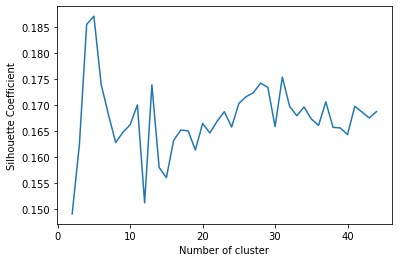

Wall time: 3min 5s


In [14]:
%%time
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, homogeneity_score
silh = {}
homog = {}
for cluster in clusters:
    kmeans = KMeans(n_clusters=cluster, n_init=50, max_iter=1000, random_state=44, n_jobs=-2).fit(bankX_20)
    label = kmeans.labels_
    sil_coeff = silhouette_score(bankX_20, label, metric='euclidean')
    homog_score = homogeneity_score(bankY, label)
    silh[cluster] = sil_coeff
    homog[cluster] = homog_score
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(cluster, sil_coeff))
    print("For n_clusters={}, The homogeneity_score is {}".format(cluster, homog_score))
plt.figure()
plt.plot(list(silh.keys()), list(silh.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Coefficient")
plt.show()

For n_clusters=2, The Silhouette Coefficient is 0.1502102093766451
For n_clusters=2, The homogeneity_score is 0.06436007793777289
For n_clusters=2, The log_likelihood score is 39.32151024608305
For n_clusters=3, The Silhouette Coefficient is 0.10614550281140868
For n_clusters=3, The homogeneity_score is 0.07429027190452198
For n_clusters=3, The log_likelihood score is 45.22466768655407
For n_clusters=4, The Silhouette Coefficient is 0.11650486878246819
For n_clusters=4, The homogeneity_score is 0.09267859671827776
For n_clusters=4, The log_likelihood score is 46.75670877724564
For n_clusters=5, The Silhouette Coefficient is 0.07484067006862569
For n_clusters=5, The homogeneity_score is 0.07644151129083179
For n_clusters=5, The log_likelihood score is 46.31582864233792
For n_clusters=6, The Silhouette Coefficient is 0.05331395471864786
For n_clusters=6, The homogeneity_score is 0.1386568419664921
For n_clusters=6, The log_likelihood score is 49.19182247073413
For n_clusters=7, The Silho

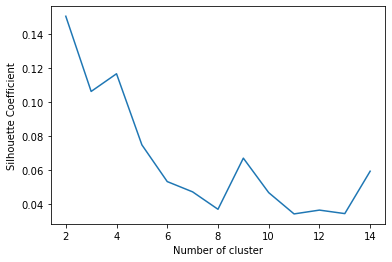

Wall time: 1min 7s


In [26]:
%%time
from sklearn.mixture import GaussianMixture
silh_EM = {}
homog_EM = {}
log_likelihood_EM = {}
for cluster in clusters:
    gmm = GaussianMixture(n_components=cluster, max_iter=100, random_state=44, 
                          n_init=5).fit(bankX_20)
    label = gmm.predict(bankX_20)
    sil_coeff = silhouette_score(bankX_20, label, metric='euclidean')
    homog_score = homogeneity_score(bankY, label)
    silh_EM[cluster] = sil_coeff
    homog_EM[cluster] = homog_score
    log_likelihood_EM[cluster] = gmm.score(bankX_20)
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(cluster, sil_coeff))
    print("For n_clusters={}, The homogeneity_score is {}".format(cluster, homog_score))
    print("For n_clusters={}, The log_likelihood score is {}".format(cluster, log_likelihood_EM[cluster]))

    
plt.figure()
plt.plot(list(silh_EM.keys()), list(silh_EM.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Coefficient")
plt.show()

NN on Lasso Selection

In [30]:
%%time
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)
from sklearn.neural_network import MLPClassifier
neural_net = MLPClassifier()
neural_net.fit(bankX_20, bankY)

Wall time: 6.89 s


MLPClassifier()

In [31]:
%%time
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report
bank_train_predictions = neural_net.predict(bankX_20)
accuracy = accuracy_score(bankY, bank_train_predictions)
print(accuracy)
print(classification_report(bankY, bank_train_predictions))

0.9711101334506526
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      6599
           1       0.69      0.19      0.29       220

    accuracy                           0.97      6819
   macro avg       0.83      0.59      0.64      6819
weighted avg       0.96      0.97      0.96      6819

Wall time: 24.9 ms


In [32]:
%%time
from sklearn.model_selection import cross_val_score
scores = cross_val_score(neural_net, bankX_20, bankY,
                         scoring="f1_weighted", cv=10)
scores, scores.mean()

Wall time: 1min 8s


(array([0.95539219, 0.95971026, 0.95121278, 0.93481813, 0.96038432,
        0.95772579, 0.96290202, 0.95203602, 0.95867437, 0.96066322]),
 0.9553519110679387)

In [10]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

def stratFold(train_X_all, train_y_all, classifier, metric, average=None,
              fold=5):
    train_metric, val_metric, indices = [], [], []
    for m in range(100, len(train_X_all), 100):
        train_X = train_X_all[:m]
        train_y = train_y_all[:m]
        skfolds = StratifiedKFold(n_splits=fold)
        metric_list = []
        metric_list_train = []
        for train_index, test_index in skfolds.split(train_X, train_y):
            train_X_folds = train_X[train_index, :]
            train_y_folds = train_y[train_index]
            test_X_fold = train_X[test_index, :]
            test_y_fold = train_y[test_index]
            classifier.fit(train_X_folds, train_y_folds)
            train_y_folds_pred = classifier.predict(train_X_folds)
            test_y_fold_pred = classifier.predict(test_X_fold)
            if average:
                metric_list.append(metric(test_y_fold, test_y_fold_pred,
                                     average=average))
                metric_list_train.append(metric(train_y_folds, train_y_folds_pred, 
                                            average=average))
            else:
                metric_list.append(metric(test_y_fold, test_y_fold_pred))
                metric_list_train.append(metric(train_y_folds, train_y_folds_pred))
                
        test_avg = sum(metric_list)/len(metric_list)
        train_avg = sum(metric_list_train)/len(metric_list_train)
        val_metric.append(test_avg)
        train_metric.append(train_avg)
        indices.append(m)
    
    return train_metric, val_metric, indices

def plot_complexity(train_scores, val_scores, indices, title, inverse_x=True):
    plt.plot(indices, train_scores , "r-+", linewidth=2, label="train")
    plt.plot(indices, val_scores, "b-+", linewidth=2, label="validation")
    plt.title(title)
    plt.legend()
    plt.grid(color='gray', linestyle='-', linewidth=0.5, alpha=0.3)
    if inverse_x:
        plt.gca().invert_xaxis()

def plot_learning_curve(train_scores, val_scores, indices, title, inverse_x=False):
    plt.plot(indices, train_scores , "r-+", linewidth=2, label="train")
    plt.plot(indices, val_scores, "b-+", linewidth=2, label="validation")
    plt.title(title)
    plt.legend()
    plt.grid(color='gray', linestyle='-', linewidth=0.5, alpha=0.3)
    if inverse_x:
        plt.gca().invert_xaxis()

In [11]:
%%time
best_net = MLPClassifier(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(60, 60), learning_rate='invscaling',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

Wall time: 0 ns


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bankX_20, 
                                                    bankY, 
                                                    test_size=0.33, 
                                                    random_state=42,
                                                    stratify=bankY)

C:\Users\kelle\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\kelle\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\kelle\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\kelle\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\kelle\anaconda3\lib\site-packages\sklearn\neural_network

Wall time: 8min 29s


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


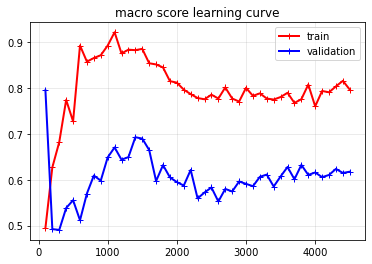

In [13]:
%%time
from sklearn.metrics import f1_score
f1_scores = stratFold(X_train, y_train, best_net, f1_score, 
                      average="macro")
plot_learning_curve(f1_scores[0], f1_scores[1], f1_scores[2], 
                    title="macro score learning curve")

In [15]:
from sklearn.metrics import roc_curve, precision_score, accuracy_score, average_precision_score, recall_score, f1_score, classification_report, confusion_matrix
best_net.fit(X_train, y_train)
test_predictions = best_net.predict(X_test)
print(classification_report(y_test, test_predictions, digits=5))
print(confusion_matrix(y_test, test_predictions))

              precision    recall  f1-score   support

           0    0.97424   0.98990   0.98201      2178
           1    0.42105   0.21918   0.28829        73

    accuracy                        0.96490      2251
   macro avg    0.69765   0.60454   0.63515      2251
weighted avg    0.95630   0.96490   0.95951      2251

[[2156   22]
 [  57   16]]


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


HR

In [15]:
HR = pd.read_csv("~//Documents//Assignment3//HR_data.csv")
HR_orig = pd.read_csv("~//Documents//Assignment3//HR_data.csv")

from sklearn.preprocessing import LabelEncoder

class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

HR['city']=HR['city'].astype(str)
HR['gender']=HR['gender'].astype(str)
HR['relevent_experience']=HR['relevent_experience'].astype(str)
HR['enrolled_university']=HR['enrolled_university'].astype(str)
HR['education_level']=HR['education_level'].astype(str)
HR['major_discipline']=HR['major_discipline'].astype(str)
HR['experience']=HR['experience'].astype(str)
HR['company_size']=HR['company_size'].astype(str)
HR['company_type']=HR['company_type'].astype(str)
HR['last_new_job']=HR['last_new_job'].astype(str)
HR = MultiColumnLabelEncoder(columns = ['city','gender','relevent_experience','enrolled_university','education_level','major_discipline','experience','company_size','company_type','last_new_job']).fit_transform(HR)


In [16]:
hrX = HR.drop("target", 1).copy().values
hrY = HR["target"].copy().values
hr_x_df = HR.drop("target",1)
min_max_scaler = preprocessing.MinMaxScaler()
hrX = min_max_scaler.fit_transform(hrX)
hrX_df = pd.DataFrame(hrX, columns=hr_x_df.columns)

In [17]:
dims_hr = list(range(1,14,1))

In [18]:
%%time
sfm = SelectFromModel(LassoCV(max_iter=10000), threshold=0.1)
sfm.fit(hrX, hrY)
n_features = sfm.transform(hrX).shape[1]

Wall time: 171 ms


In [19]:
n_features

5

In [22]:
x_prime = sfm.transform(hrX)

In [24]:
sfm = SelectFromModel(LassoCV(max_iter=10000), max_features=8)
sfm.fit(hrX, hrY)
hrX_8 = sfm.transform(hrX)
sfm.transform(hrX).shape[1]

8

C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=2, The Silhouette Coefficient is 0.3365730992701946
For n_clusters=2, The homogeneity_score is 0.014128623563190841


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=3, The Silhouette Coefficient is 0.2043221908589473
For n_clusters=3, The homogeneity_score is 0.025402845075709685


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=4, The Silhouette Coefficient is 0.21870792543163692
For n_clusters=4, The homogeneity_score is 0.02551568073348682


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=5, The Silhouette Coefficient is 0.21831044869986338
For n_clusters=5, The homogeneity_score is 0.02824611319854622


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=6, The Silhouette Coefficient is 0.22927460006684475
For n_clusters=6, The homogeneity_score is 0.03004548928773587


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=7, The Silhouette Coefficient is 0.21652577902139783
For n_clusters=7, The homogeneity_score is 0.057898790383829266


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=8, The Silhouette Coefficient is 0.2196520535646357
For n_clusters=8, The homogeneity_score is 0.06837930064241014


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=9, The Silhouette Coefficient is 0.23187602647445157
For n_clusters=9, The homogeneity_score is 0.06535160085511829


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=10, The Silhouette Coefficient is 0.23657772292888016
For n_clusters=10, The homogeneity_score is 0.09916538347986188


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=11, The Silhouette Coefficient is 0.234848390110605
For n_clusters=11, The homogeneity_score is 0.10417787322945266


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=12, The Silhouette Coefficient is 0.23216673518580572
For n_clusters=12, The homogeneity_score is 0.10054689318131543


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=13, The Silhouette Coefficient is 0.2368720890563143
For n_clusters=13, The homogeneity_score is 0.10349182582104981


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=14, The Silhouette Coefficient is 0.2283479657899848
For n_clusters=14, The homogeneity_score is 0.10394573897943968


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=15, The Silhouette Coefficient is 0.22403973441780392
For n_clusters=15, The homogeneity_score is 0.10032446134557065


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=16, The Silhouette Coefficient is 0.23145348491050236
For n_clusters=16, The homogeneity_score is 0.10330989227934602


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=17, The Silhouette Coefficient is 0.2343099189688509
For n_clusters=17, The homogeneity_score is 0.10212460603040123


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=18, The Silhouette Coefficient is 0.23763802014123447
For n_clusters=18, The homogeneity_score is 0.11153420029962044


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=19, The Silhouette Coefficient is 0.24560726887766257
For n_clusters=19, The homogeneity_score is 0.10436562031113691


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=20, The Silhouette Coefficient is 0.244041427805425
For n_clusters=20, The homogeneity_score is 0.12650432447082752


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=21, The Silhouette Coefficient is 0.24295345391413875
For n_clusters=21, The homogeneity_score is 0.1096783097859898


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=22, The Silhouette Coefficient is 0.23006087187914898
For n_clusters=22, The homogeneity_score is 0.11693848678267987


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=23, The Silhouette Coefficient is 0.24232955871043305
For n_clusters=23, The homogeneity_score is 0.11336039191330109


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=24, The Silhouette Coefficient is 0.24396076469211306
For n_clusters=24, The homogeneity_score is 0.11919617175458291


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=25, The Silhouette Coefficient is 0.24443095502418055
For n_clusters=25, The homogeneity_score is 0.12387475504197604


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=26, The Silhouette Coefficient is 0.2440878313629106
For n_clusters=26, The homogeneity_score is 0.12362759272625995


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=27, The Silhouette Coefficient is 0.24817705124779704
For n_clusters=27, The homogeneity_score is 0.13083819797684682


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=28, The Silhouette Coefficient is 0.2491198818342949
For n_clusters=28, The homogeneity_score is 0.1339215141818599


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=29, The Silhouette Coefficient is 0.24443347833488546
For n_clusters=29, The homogeneity_score is 0.12843767969835013


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=30, The Silhouette Coefficient is 0.24369995986073795
For n_clusters=30, The homogeneity_score is 0.1284026725220438


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=31, The Silhouette Coefficient is 0.2412191741214801
For n_clusters=31, The homogeneity_score is 0.1340438499295734


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=32, The Silhouette Coefficient is 0.2530473792269204
For n_clusters=32, The homogeneity_score is 0.12736599162943799


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=33, The Silhouette Coefficient is 0.243847473535677
For n_clusters=33, The homogeneity_score is 0.13307095185546955


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=34, The Silhouette Coefficient is 0.25507941226901876
For n_clusters=34, The homogeneity_score is 0.1332803402001206


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=35, The Silhouette Coefficient is 0.2511398727000063
For n_clusters=35, The homogeneity_score is 0.143233510936837


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=36, The Silhouette Coefficient is 0.25444757260783396
For n_clusters=36, The homogeneity_score is 0.13206906376902328


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=37, The Silhouette Coefficient is 0.2514245491965513
For n_clusters=37, The homogeneity_score is 0.1337999705482306


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=38, The Silhouette Coefficient is 0.2534289823389441
For n_clusters=38, The homogeneity_score is 0.13276619276461007


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=39, The Silhouette Coefficient is 0.2508064451934227
For n_clusters=39, The homogeneity_score is 0.1410451961560013


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=40, The Silhouette Coefficient is 0.2517054593457992
For n_clusters=40, The homogeneity_score is 0.14037216079691306


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=41, The Silhouette Coefficient is 0.254119836393341
For n_clusters=41, The homogeneity_score is 0.14229643875309494


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=42, The Silhouette Coefficient is 0.2560324021589
For n_clusters=42, The homogeneity_score is 0.14292504549975046


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=43, The Silhouette Coefficient is 0.25393818856369416
For n_clusters=43, The homogeneity_score is 0.14118955737779915


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=44, The Silhouette Coefficient is 0.2539961954402265
For n_clusters=44, The homogeneity_score is 0.14013265388596302


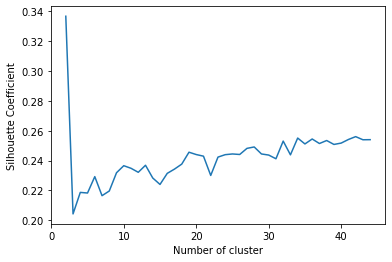

Wall time: 6min 9s


In [25]:
%%time
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, homogeneity_score
clusters = list(range(2,45,1))
silh = {}
homog = {}
for cluster in clusters:
    kmeans = KMeans(n_clusters=cluster, n_init=50, max_iter=1000, random_state=44, n_jobs=-2).fit(hrX_8)
    label = kmeans.labels_
    sil_coeff = silhouette_score(hrX_8, label, metric='euclidean')
    homog_score = homogeneity_score(hrY, label)
    silh[cluster] = sil_coeff
    homog[cluster] = homog_score
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(cluster, sil_coeff))
    print("For n_clusters={}, The homogeneity_score is {}".format(cluster, homog_score))
plt.figure()
plt.plot(list(silh.keys()), list(silh.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Coefficient")
plt.show()

For n_clusters=2, The Silhouette Coefficient is 0.2444317712524169
For n_clusters=2, The homogeneity_score is 0.014128623563190841
For n_clusters=2, The log_likelihood score is 4.381762974149374
For n_clusters=3, The Silhouette Coefficient is 0.14406981691429455
For n_clusters=3, The homogeneity_score is 0.017092261589677454
For n_clusters=3, The log_likelihood score is 8.03375168868573
For n_clusters=4, The Silhouette Coefficient is 0.08940542850199878
For n_clusters=4, The homogeneity_score is 0.019681883068901188
For n_clusters=4, The log_likelihood score is 10.342958957563715
For n_clusters=5, The Silhouette Coefficient is 0.07759716063925036
For n_clusters=5, The homogeneity_score is 0.042645712076837164
For n_clusters=5, The log_likelihood score is 10.99480335082436
For n_clusters=6, The Silhouette Coefficient is 0.08553217688496652
For n_clusters=6, The homogeneity_score is 0.021373169282627665
For n_clusters=6, The log_likelihood score is 12.575779329408324
For n_clusters=7, Th

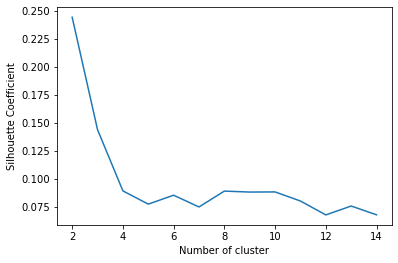

Wall time: 2min 15s


In [48]:
%%time
from sklearn.mixture import GaussianMixture
silh_wine_EM = {}
homog__wine_EM = {}
log_likelihood_wine_EM = {}
for cluster in clusters:
    gmm = GaussianMixture(n_components=cluster, max_iter=100, random_state=44, 
                          n_init=5).fit(hrX_13)
    label = gmm.predict(hrX_13)
    sil_coeff = silhouette_score(hrX_13, label, metric='euclidean')
    homog_score = homogeneity_score(hrY, label)
    silh_wine_EM[cluster] = sil_coeff
    homog__wine_EM[cluster] = homog_score
    log_likelihood_wine_EM[cluster] = gmm.score(hrX_13)
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(cluster, sil_coeff))
    print("For n_clusters={}, The homogeneity_score is {}".format(cluster, homog_score))
    print("For n_clusters={}, The log_likelihood score is {}".format(cluster, log_likelihood_wine_EM[cluster]))
plt.figure()
plt.plot(list(silh_wine_EM.keys()), list(silh_wine_EM.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Coefficient")
plt.show()